### Importing all the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

## Problem 01

### Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

Carat    - Carat weight of the cubic zirconia.

Cut	     - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color    - Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 - cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL =                flawless,- I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 - The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 - the Price of the cubic zirconia.

X	     - Length of the cubic zirconia in mm.

Y	     - Width of the cubic zirconia in mm.

Z	     - Height of the cubic zirconia in mm.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

#### Loading Dataset

In [2]:
df1 = pd.read_csv('cubic_zirconia.csv')

#### Checking the Top 5 Records

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Checking the Bottom 5 Records

In [4]:
df1.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


#### Checking the Shape of the Dataset 

In [5]:
r, c = df1.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 26967
No of Columns in the dataset : 11


In [6]:
# from the above data set you can see that the first column consists of only index numbers, 
# hence that column is not much of use for our modelling. Hence we will be dropping the column

df1 = df1.drop('Unnamed: 0', axis = 1)

In [191]:
df1.shape 

(26967, 10)

From the above data we can say that there are around **10 variables** and **26,967 observations**

Dataset consists of mixed observations like numerical & categorical

#### Checking the info of the Dataset

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


#### Checking the summary of the dataset

In [35]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


From the above we can say the following
1. Minimum price is 326 and maximum price is 18818
2. Minimum carat value is 0.20 and maximum carat value is 4.50
3. We can see that the mean, median of all the variables are not in one scale
4. Minimum values of x,y & z is 0 which will be of no use for our model building, hence we will be dropping the 0 rows further.

#### Checking for any missing values

In [45]:
def missing_check(df1):
    total = df1.isnull().sum().sort_values(ascending=False)  
    percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df1)

,Total,Percent
depth,697,0.025846
price,0,0.000000
z,0,0.000000
y,0,0.000000
x,0,0.000000
table,0,0.000000
clarity,0,0.000000
color,0,0.000000
cut,0,0.000000
carat,0,0.000000


From the above we can see that the depth column has 697 observations missing, since the value is less when compared to number of observations we can do the following,
1. Drop the null values
2. Imputing with Mean value
3. Imputing with Median.

#### Checking for any duplicate values

In [22]:
dups = df1.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


We can see that there are 34 duplicate rows, since the number is less we can drop the duplicate rows. 

#### Dropping duplicate rows 

In [7]:
df1.drop_duplicates(inplace=True) 

In [8]:
df1.duplicated().sum()

0

In [9]:
df1.shape

(26933, 10)

We can see we have dropped the duplicate values in the data set

#### Univariate Analysis

In [10]:
cols = df1[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

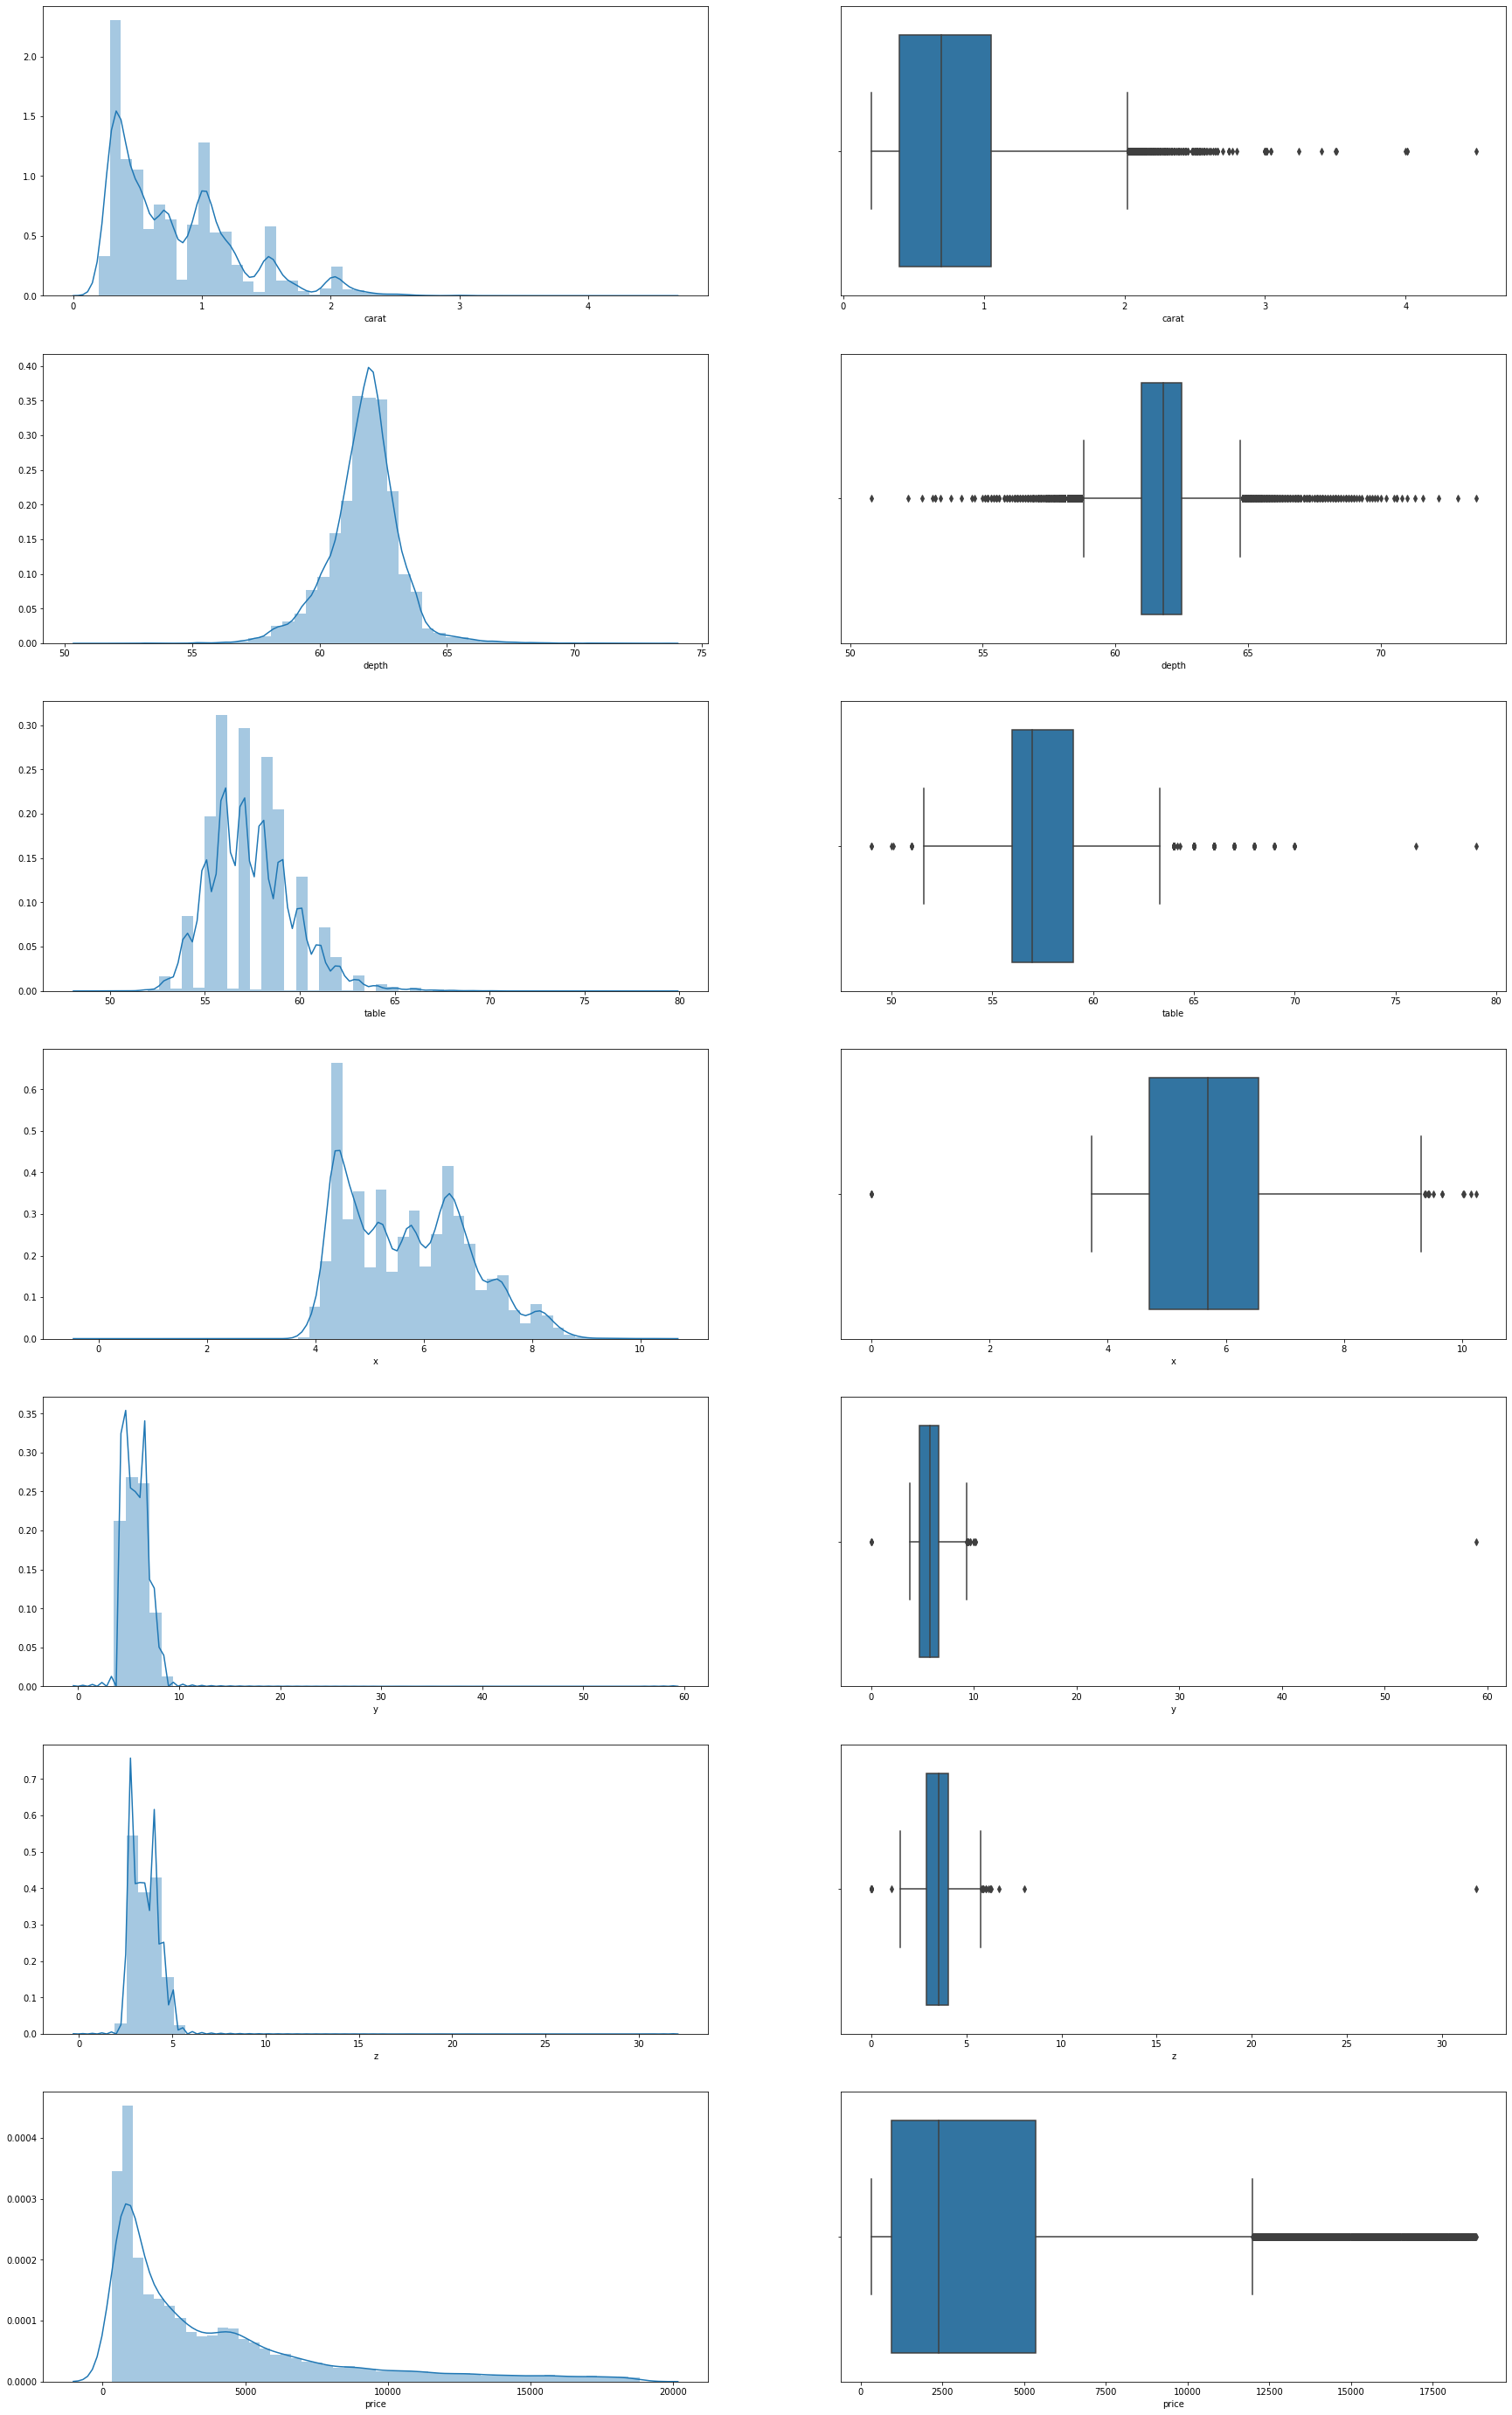

In [89]:
fig,axes = plt.subplots(nrows = 7, ncols = 2)

fig.set_size_inches(30,50)

m = 0
n = 0
for col in cols:
    sns.distplot(df1[col],ax = axes[m][n])
    n = n + 1
    sns.boxplot(df1[col],ax = axes[m][n])
    m = m + 1
    n = n - 1

From the above hist-plot and box we can observe the following,
1. Distribution of carat seems to be positively skewed and there are multiple peak points in the distribution. Box plot of carat seems to have large number of outliers. 
2. Distribution of depth seems to be normal distribution; depth also seems to have a greater number of outliers.
3. Distribution of table seems to be positively skewed and table consists of few outliers. 
4. Distribution of x seems to be positively skewed and x consists of few outliers.
5. Distribution of y seems to be positively skewed and y consists of few outliers.
6. Distribution of z seems to be positively skewed and z consists of few outliers.
7. Distribution of price seems to be positively skewed and price also seems to have a greater number of outliers. 


#### Bi-variate Analysis

#### Count Plot for Quality of Cut

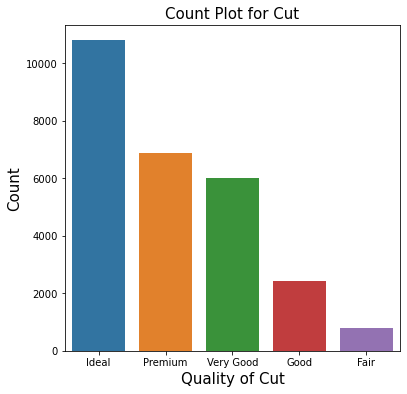

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(df1['cut'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Quality of Cut',fontsize = 15)
plt.title('Count Plot for Cut',fontsize = 15)
plt.show()

From the above count plot we can say that **Ideal cut** seems to be most preferred stone and **Fair** seems to be least preferred

#### Count Plot for Different types of Color

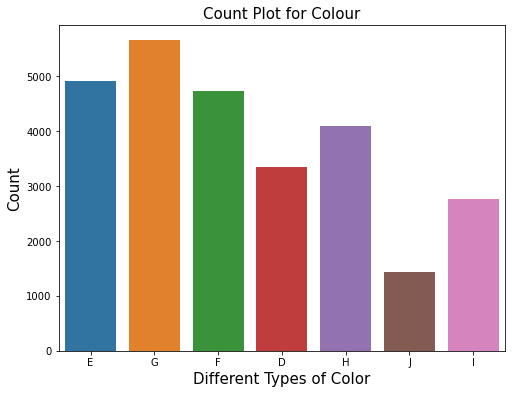

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(df1['color'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Different Types of Color',fontsize = 15)
plt.title('Count Plot for Colour',fontsize = 15)
plt.show()

From the above count plot we can say that G,E,F & H seems to be mostly preferred colors for the stone and J is the least preferred color stone

#### Count Plot for Clarity

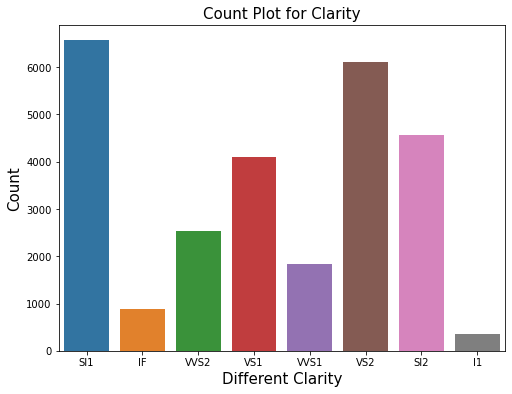

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(df1['clarity'])
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Different Clarity',fontsize = 15)
plt.title('Count Plot for Clarity',fontsize = 15)
plt.show()

From the above count plot we can say that SI1 and VS2 seems to most preferred clarity stones and IF & I1 seems to be least preferred clarity stone

#### Cut v/s Price Barplot

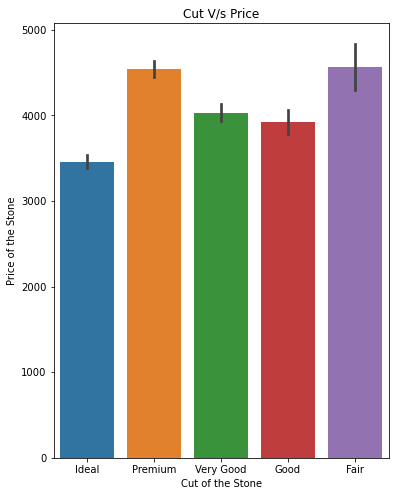

In [34]:
plt.subplots(figsize = (6,8))

sns.barplot(x = 'cut', y = 'price', data = df1)

plt.title('Cut V/s Price')

plt.xlabel("Cut of the Stone")
plt.ylabel("Price of the Stone");

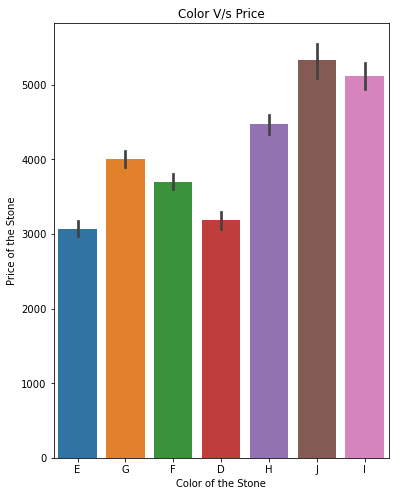

In [48]:
plt.subplots(figsize = (6,8))

sns.barplot(x = 'color', y = 'price', data = df1)

plt.title('Color V/s Price')

plt.xlabel("Color of the Stone")
plt.ylabel("Price of the Stone");

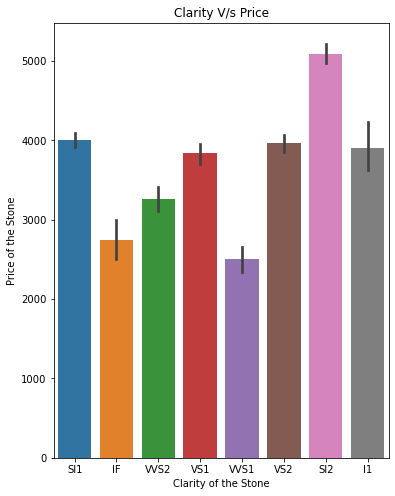

In [49]:
plt.subplots(figsize = (6,8))

sns.barplot(x = 'clarity', y = 'price', data = df1)

plt.title('Clarity V/s Price')

plt.xlabel("Clarity of the Stone")
plt.ylabel("Price of the Stone");

#### Multi-Variate Analysis : Pairplot

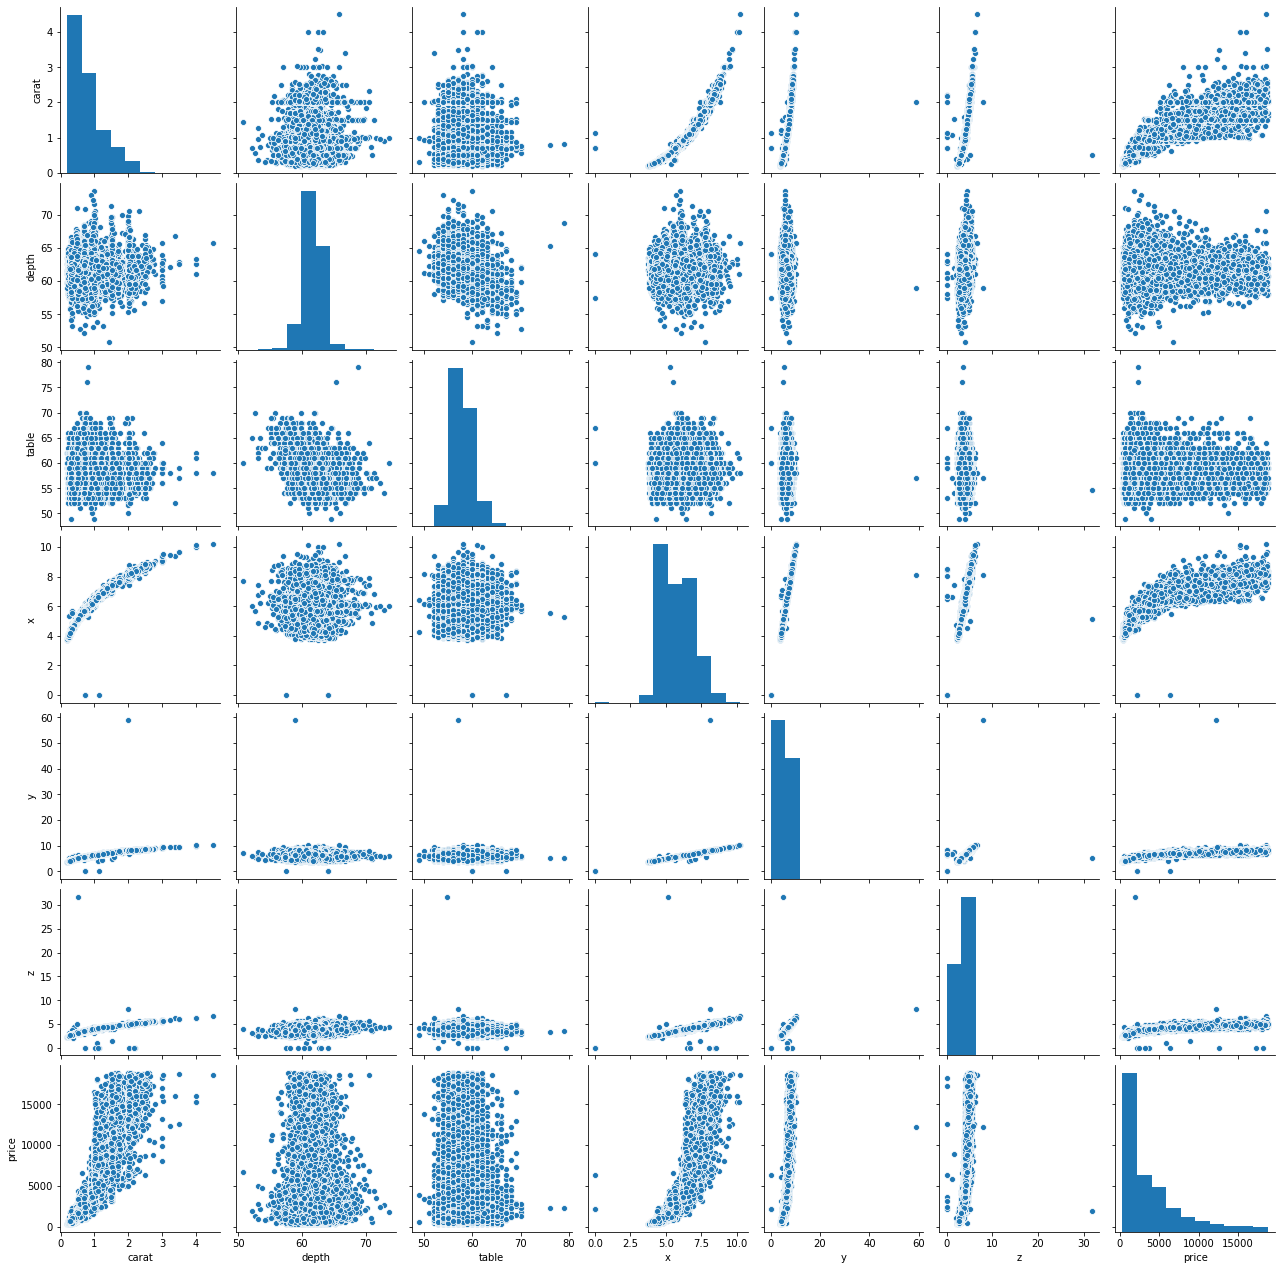

In [98]:
sns.pairplot(df1)

With the help of the above pair plot we can understand the Univariate & Bi-variate trends for all the variables in the dataset

#### Heatmap

In [99]:
corr = df1.corr()

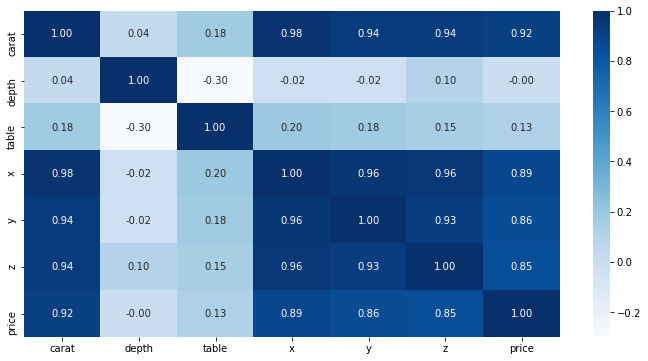

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

From the above heatmap we can say that the following are higly correlated to each other
1. Carat
2. X
3. Y
4. Z
5. Price 

#### Checking outliers in the data set using Box Plot

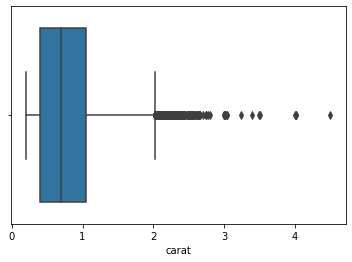

In [56]:
sns.boxplot(df1['carat']) #Box plot for Carat

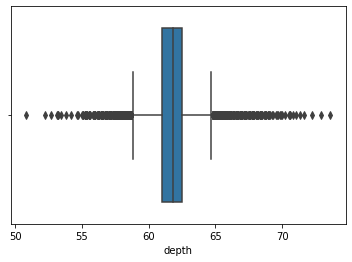

In [57]:
sns.boxplot(df1['depth']) #Box plot for Depth

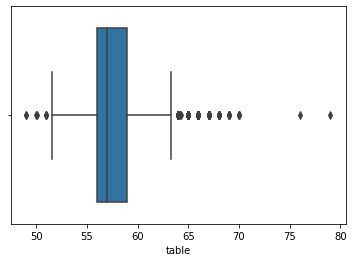

In [58]:
sns.boxplot(df1['table']) #Box plot for Table

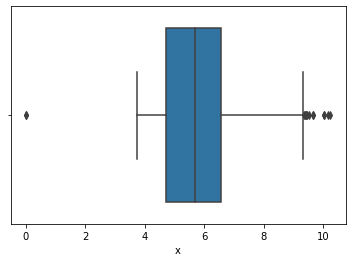

In [59]:
sns.boxplot(df1['x']) #Box plot for X

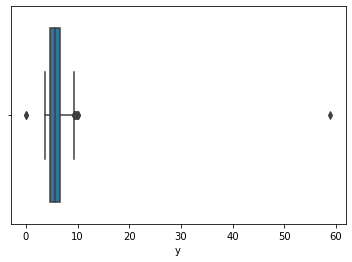

In [60]:
sns.boxplot(df1['y']) #Box plot for Y

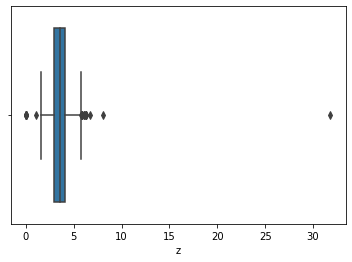

In [61]:
sns.boxplot(df1['z']) #Box plot for Z

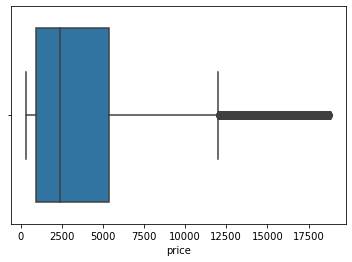

In [62]:
sns.boxplot(df1['price']) #Box plot for Price

From the above we see that outliers is present in all variables and presence of Outliers effects in our model building. Hence we will be treating all the outliers using the IQR method i.e. by imputing the outliers with Lower Range/Upper Range

#### Treating Outliers

There are several ways of treating them, below are few of them:

1. Drop the outlier value
2. Imputing with Lower Range/Upper Range
Here we will be replacing the outlier by imputing with Lower Range/Upper Range using the IQR method

In [196]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [197]:
for col in cols:
    lower_limit, upper_limit = remove_outlier(df1[col])
    df1[col] = np.where(df1[col] > upper_limit, upper_limit, df1[col])
    df1[col] = np.where(df1[col] < lower_limit, lower_limit, df1[col]) 

C:\Users\Sastry\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


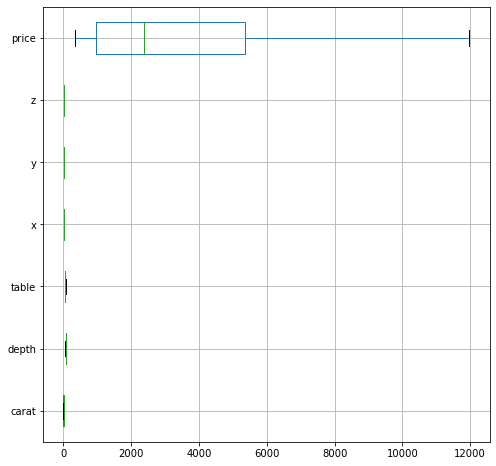

In [198]:
df1[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].boxplot(figsize = (8,8), vert = False)

From the above we can see that we have treated outliers using the IQR method.

#### Checking the Unique Values for Categorical Variables

In [154]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column)
        print(df1[column].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [156]:
def missing_check(df1):
    total = df1.isnull().sum().sort_values(ascending=False)  
    percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df1)

,Total,Percent
depth,697,0.025879
price,0,0.000000
z,0,0.000000
y,0,0.000000
x,0,0.000000
table,0,0.000000
clarity,0,0.000000
color,0,0.000000
cut,0,0.000000
carat,0,0.000000


From the above we can see that depth column has 697 observations of null value, which we need to impute by using median values

#### Imputing Null values with median

In [199]:
median = df1['depth'].median()
df1['depth'] = df1['depth'].fillna(median)

In [200]:
def missing_check(df1):
    total = df1.isnull().sum().sort_values(ascending=False)  
    percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df1)

,Total,Percent
price,0,0.0
z,0,0.0
y,0,0.0
x,0,0.0
table,0,0.0
depth,0,0.0
clarity,0,0.0
color,0,0.0
cut,0,0.0
carat,0,0.0


From the above we can say that there is no null values present in the data set. After Droping the dupicate Values, Treating the outliers and imputing the null values, the data is clear and ready for model building.

In [159]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.745589,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.243152,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,58.750000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,64.750000,63.500000,9.310000,9.285000,5.750000,11972.500000


Since we have treated the outliers the minimum value '0' present in x,y &z dimensions also been treated hence there is no present of '0' in the data set. This can be seen in the above summary

Scaling is not required/not necessary in this data set as only the scale of **Target Variable** is huge when compared to Independent/Dependent Variable

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

First we will be encoding the data, i.e. will be converting the categorical values into continous/numerical values so as to build the model. Here as the unique values for the categorical variables is more, we will be doing encoding manually. 

#### Checking the Unique Values of the Categorical Variables

In [155]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column)
        print(df1[column].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




#### Converting Categorical Variables into Numerical/Continous

In [201]:
df1['cut']=np.where(df1['cut'] =='Fair', '0', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Good', '1', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Very Good', '2', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Premium', '3', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Ideal', '4', df1['cut'])

In [202]:
df1['color']=np.where(df1['color'] =='D', '0', df1['color'])
df1['color']=np.where(df1['color'] =='E', '1', df1['color'])
df1['color']=np.where(df1['color'] =='F', '2', df1['color'])
df1['color']=np.where(df1['color'] =='G', '3', df1['color'])
df1['color']=np.where(df1['color'] =='H', '4', df1['color'])
df1['color']=np.where(df1['color'] =='I', '5', df1['color'])
df1['color']=np.where(df1['color'] =='J', '6', df1['color'])

In [203]:
df1['clarity']=np.where(df1['clarity'] =='IF', '0', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS1', '1', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS2', '2', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS1', '3', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS2', '4', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI1', '5', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI2', '6', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='I1', '7', df1['clarity'])

In [204]:
df1['cut'] = df1['cut'].astype('int')
df1['color'] = df1['color'].astype('int')
df1['clarity'] = df1['clarity'].astype('int')

In [205]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,5,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,2,1,60.4,59.0,4.35,4.43,2.65,779.0


In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 2.0 MB


From the above we can see that Categorical Variables are converted into Numerical/Continous Variables. 

In [207]:
df1.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,2.909702,2.605206,3.946423,61.745589,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.113165,1.705883,1.646749,1.243152,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,0.000000,0.000000,0.000000,58.750000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,2.000000,1.000000,3.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,4.000000,6.000000,7.000000,64.750000,63.500000,9.310000,9.285000,5.750000,11972.500000


#### Train Test Split

First step is to separate the Target Variable , we will be dropping the Target from the dataset and assigning it to variable 'X' and pop in another variable 'y'

In [208]:
X = df1.drop('price',axis=1)
y = df1[['price']]

Now we will split the data in to train and test. The training data consists of 70% of the data
and testing data consists of 30%.

In [209]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [210]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
22114,0.34,2,4,4,62.4,60.0,4.41,4.44,2.76
2275,0.30,4,1,4,61.2,55.0,4.35,4.31,2.65
19183,0.50,4,3,5,62.5,57.0,5.09,5.05,3.17
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15
25414,1.02,3,2,6,61.1,62.0,6.54,6.49,3.98


In [177]:
X_train.shape

(18853, 9)

In [176]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
16997,1.26,3,5,5,60.50,62.0,6.97,6.92,4.20
24457,0.90,2,3,4,58.75,59.0,6.35,6.36,3.72
16612,1.37,4,2,3,59.60,57.0,7.28,7.22,4.32
308,0.84,1,3,3,63.60,57.0,5.98,5.93,3.79
26652,2.00,2,6,4,60.80,62.0,8.09,8.12,4.93


In [211]:
X_test.shape

(8080, 9)

#### Linear Regression Model

In [212]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Let us explore the coefficients for each of the independent attributes

In [248]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient of {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient of carat is 8830.478833167044
The coefficient of cut is 110.85527008894476
The coefficient of color is -278.00256097637924
The coefficient of clarity is -440.5569029756834
The coefficient of depth is -7.494044280023955
The coefficient of table is -12.369930566282857
The coefficient of x is -1413.2161779425774
The coefficient of y is 1246.7786181443792
The coefficient of z is -310.68516993203764


#### Let us check the intercept for the model

In [218]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2098.2190812061544


#### R-square on Training Data

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent
variable that's explained by an independent variable or variables in a regression model

In [221]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.931167171426321


#### RSME on Training Data

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
Residuals are a measure of how far from the regression line data points are; RMSE is a measure of
how spread out these residuals are. In other words, it tells you how concentrated the data is around
the line of best fit.

In [226]:
predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

909.2442557260213

From the above R-Square & RSME we can say the following

1. 93.11% of the variation in the price is explained by the predictors in the model for the train data set
2. Root Mean Square Error (RSME) for the Training Data Set is 909.244

#### R-Square on Test Data

In [249]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9312114538233498


#### RSME on Test Data 

In [228]:
predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.1428282209611

From the above R-Square & RSME we can say the following

1. 93.12% of the variation in the price is explained by the predictors in the model for the Test data set
2. Root Mean Square Error (RSME) for the Test Data Set is 911.14

#### Linear Regression Model Using Stats Model

R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2. Scikit does not provide a facility for adjusted R^2... so we use statsmodel, a library that gives results similar to what you obtain in R language This library expects the X and Y to be given in one single dataframe

#### Importing the Required library

In [235]:
import statsmodels.formula.api as smf

In [233]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [234]:
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,4,4,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,1,4,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,5,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,2,6,61.1,62.0,6.54,6.49,3.98,4057.0


In [250]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
16997,1.26,3,5,5,60.50,62.0,6.97,6.92,4.20,5292.0
24457,0.90,2,3,4,58.75,59.0,6.35,6.36,3.72,4484.0
16612,1.37,4,2,3,59.60,57.0,7.28,7.22,4.32,11649.0
308,0.84,1,3,3,63.60,57.0,5.98,5.93,3.79,3316.0
26652,2.00,2,6,4,60.80,62.0,8.09,8.12,4.93,11972.5


#### We will now formulate an expression where dependent variable is a function of all the independent variables:

In [237]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'
lm1 = smf.ols(formula = expr, data = data_train).fit()

In [238]:
lm1.params

Intercept    2098.219081
carat        8830.478833
cut           110.855270
color        -278.002561
clarity      -440.556903
depth          -7.494044
table         -12.369931
x           -1413.216178
y            1246.778618
z            -310.685170
dtype: float64

In [239]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:48:54   Log-Likelihood:            -1.5519e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2098.2191    693.408      3.026      0.0

From the above summary we can say the following
1. R-Square and adjusted R-Square are almost same i.e., 0.931, this signifies that the model is good on both train and test data.
2. The overall value of P is less than alpha, so we will be rejecting the null hypothesis
3. There is no regression coefficients with value 0.

#### RSME on the Training Data Set

In [245]:
mse = np.mean((lm1.predict(data_train.drop('price', axis = 1))-data_train['price'])**2)
np.sqrt(mse)

909.2442557260229

#### RSME on the Test Data 

In [246]:
mse1 = np.mean((lm1.predict(data_test.drop('price', axis = 1))-data_test['price'])**2)
np.sqrt(mse1)

911.1428282209595

#### Predictions on Test Data set

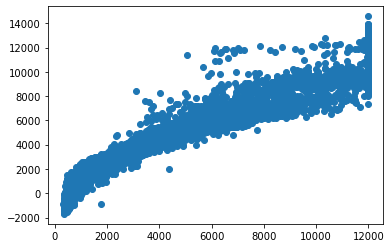

In [247]:
y_pred = lm1.predict(data_test)
plt.scatter(y_test['price'], y_pred)
plt.show()

The final Linear Regression equation is

price = (2098) * Intercept + (8830) * carat + (111) * cut + (-278) * color + (-441) * clarity + (-7.5) * depth + (-12) * table + (-1413) * x + (1247) * y + (-311) * z

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

We had a business problem to predict the price of the stone and provide insights for the company on the profits on different prize slots. The given data set consisted of 10 variables and 26,967 observations. Variable ‘depth’ consist of null values which has been imputed with the median value. The data set also consisted of 34 duplicate values, which has been removed. After completion of preprocessing of the data we have carried out the EDA analysis.

From the EDA analysis we understand the following,
1. Ideal, Premium & Very Good types of Cut were mostly sold stones. 
2. G,E,F & H color stones are more in demand when compared to other colors.
3. SI1, VS2, SI2 & VS1 are more preferred clarity for the stone.

By using Sklearn & Stats model we build two models using the price as the Target variable. The computed R-square is around 93% for both the models which means that the  predictions were able to capture 93% variations in the price.  From the OLS method we can see that the overall P value is less than alpha hence we will be rejecting the Null hypothesis i.e. There is no correlation between independent variable and target variable.  For better performance of the model, we can drop the columns which is having higher P value or higher correlation and then run the model again. 


#### Final Linear Regression Equation:

price = (2098) * Intercept + (8830) * carat + (111) * cut + (-278) * color + (-441) * clarity + (-7.5) * depth + (-12) * table + (-1413) * x + (1247) * y + (-311) * z

#### Recommendations:

1. Ideal, Premium & Very Good cut type of Stones are in high demand so it would be better if company can keep high prices for these type of stones. Fair cut type of stone is having least demand; hence company can look into the making of these type of cut stones. 

2. Similarly, G, E, F & H color of stones are mostly preferred colors, hence it would be appropriate if company would increase the making of these particular stones. J color stone is having least preference hence company can reduce the making of these stones. 

3. Similarly, SI1, VS2, SI2 and VS1 clarity stones are the mostly used. Hence it would be better if these kind of stones are marketed so as to bring profits. IF & I1 is least preferred stone. 

4. Carat is the highest coefficient in predicting the price of the stone. Change in 1 unit of carat will have 8830 times impact on price. Means as the carat is increased, the price of the stone to be increased 8830 times. Hence it is recommended to focus on optimizing the combination of increased carat weight of stone as much as possible so that profit increases.

5. Similarly, the type of cut is having positive coefficient in predicting the price of the stone. Change in 1 unit of cut will have 111 times impact on price. Hence its recommended to focus on the type of cut which is ideally in demand so as to increase the profit. 


#### Five Best Attributes:

1. Carat
2. Y, Width of the cubic zirconia in mm
3. X, Length of the cubic zirconia in mm
4. Clarity of cubic zirconia
5. Z, Height of the cubic zirconia in mm

## Problem 02 : Logistic Regression & Linear Discriminant Analysis

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary

Holiday_Package - Opted for Holiday Package yes/no?

Salary - Employee salary

age - Age in years

edu - Years of formal education

no_young_children - The number of young children (younger than 7 years)

no_older_children - Number of older children

foreign - foreigner Yes/No

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

#### Loading Dataset

In [2]:
df2 = pd.read_csv('Holiday_Package.csv')

#### Checking the Top 5 Records

In [3]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


#### Checking the Bottom 5 Records

In [57]:
df2.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


#### Checking the Shape of the Dataset 

In [58]:
df2.shape

(872, 8)

In [3]:
# from the above data set you can see that the first column consists of only index numbers, 
# hence that column is not much of use for our modelling. Hence we will be dropping the column

df2 = df2.drop('Unnamed: 0', axis = 1)

In [5]:
df2.shape

(872, 7)

From the above data we can say that there are around **7 variables** and **872 observations**

Dataset consists of mixed observations like numerical & categorical

#### Checking the info of the Dataset

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Holiday_Package       872 non-null    object
 1   Salary                872 non-null    int64 
 2   Age                   872 non-null    int64 
 3   Years_of_Education    872 non-null    int64 
 4   Younger_Children(<7)  872 non-null    int64 
 5   Older_Children(>7)    872 non-null    int64 
 6   Foreigner             872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


From the above we can say that there are two data types i.e. Object & integer type. Holiday package and foreign are of categorical variables.

#### Checking the Summary of the data set

In [4]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


From the above we can say the following
1. Minimum salary is 1322 and maximum salary is 2,36,961. We can see there is huge difference between the minimum and maximum salary.
2. Minimum age is 20 and maximum age is 62.


#### Checking for any missing/null values in the data set

In [5]:
def missing_check(df2):
    total = df2.isnull().sum().sort_values(ascending=False)  
    percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df2)

,Total,Percent
foreign,0,0.0
no_older_children,0,0.0
no_young_children,0,0.0
educ,0,0.0
age,0,0.0
Salary,0,0.0
Holliday_Package,0,0.0


From the above we can see that there are no missing or null values in the data set

#### Checking for any duplicate values in the data set

In [6]:
dups1 = df2.duplicated().sum()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 0


#### Unique Values in Categorical Data

In [73]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column)
        print(df2[column].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




#### Renaming the Columns Properly

In [4]:
df2.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True) 
df2.rename(columns = {'age':'Age'}, inplace = True)
df2.rename(columns = {'educ':'Years_of_Education'}, inplace = True) 
df2.rename(columns = {'no_young_children':'Younger_Children(<7)'}, inplace = True)
df2.rename(columns = {'no_older_children':'Older_Children(>7)'}, inplace = True)
df2.rename(columns = {'foreign':'Foreigner'}, inplace = True)

In [7]:
df2.head()

,Holiday_Package,Salary,Age,Years_of_Education,Younger_Children(<7),Older_Children(>7),Foreigner
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


#### Univariate Analysis

In [8]:
cols1 = df2[['Salary', 'Age', 'Years_of_Education', 'Younger_Children(<7)', 'Older_Children(>7)']]

C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


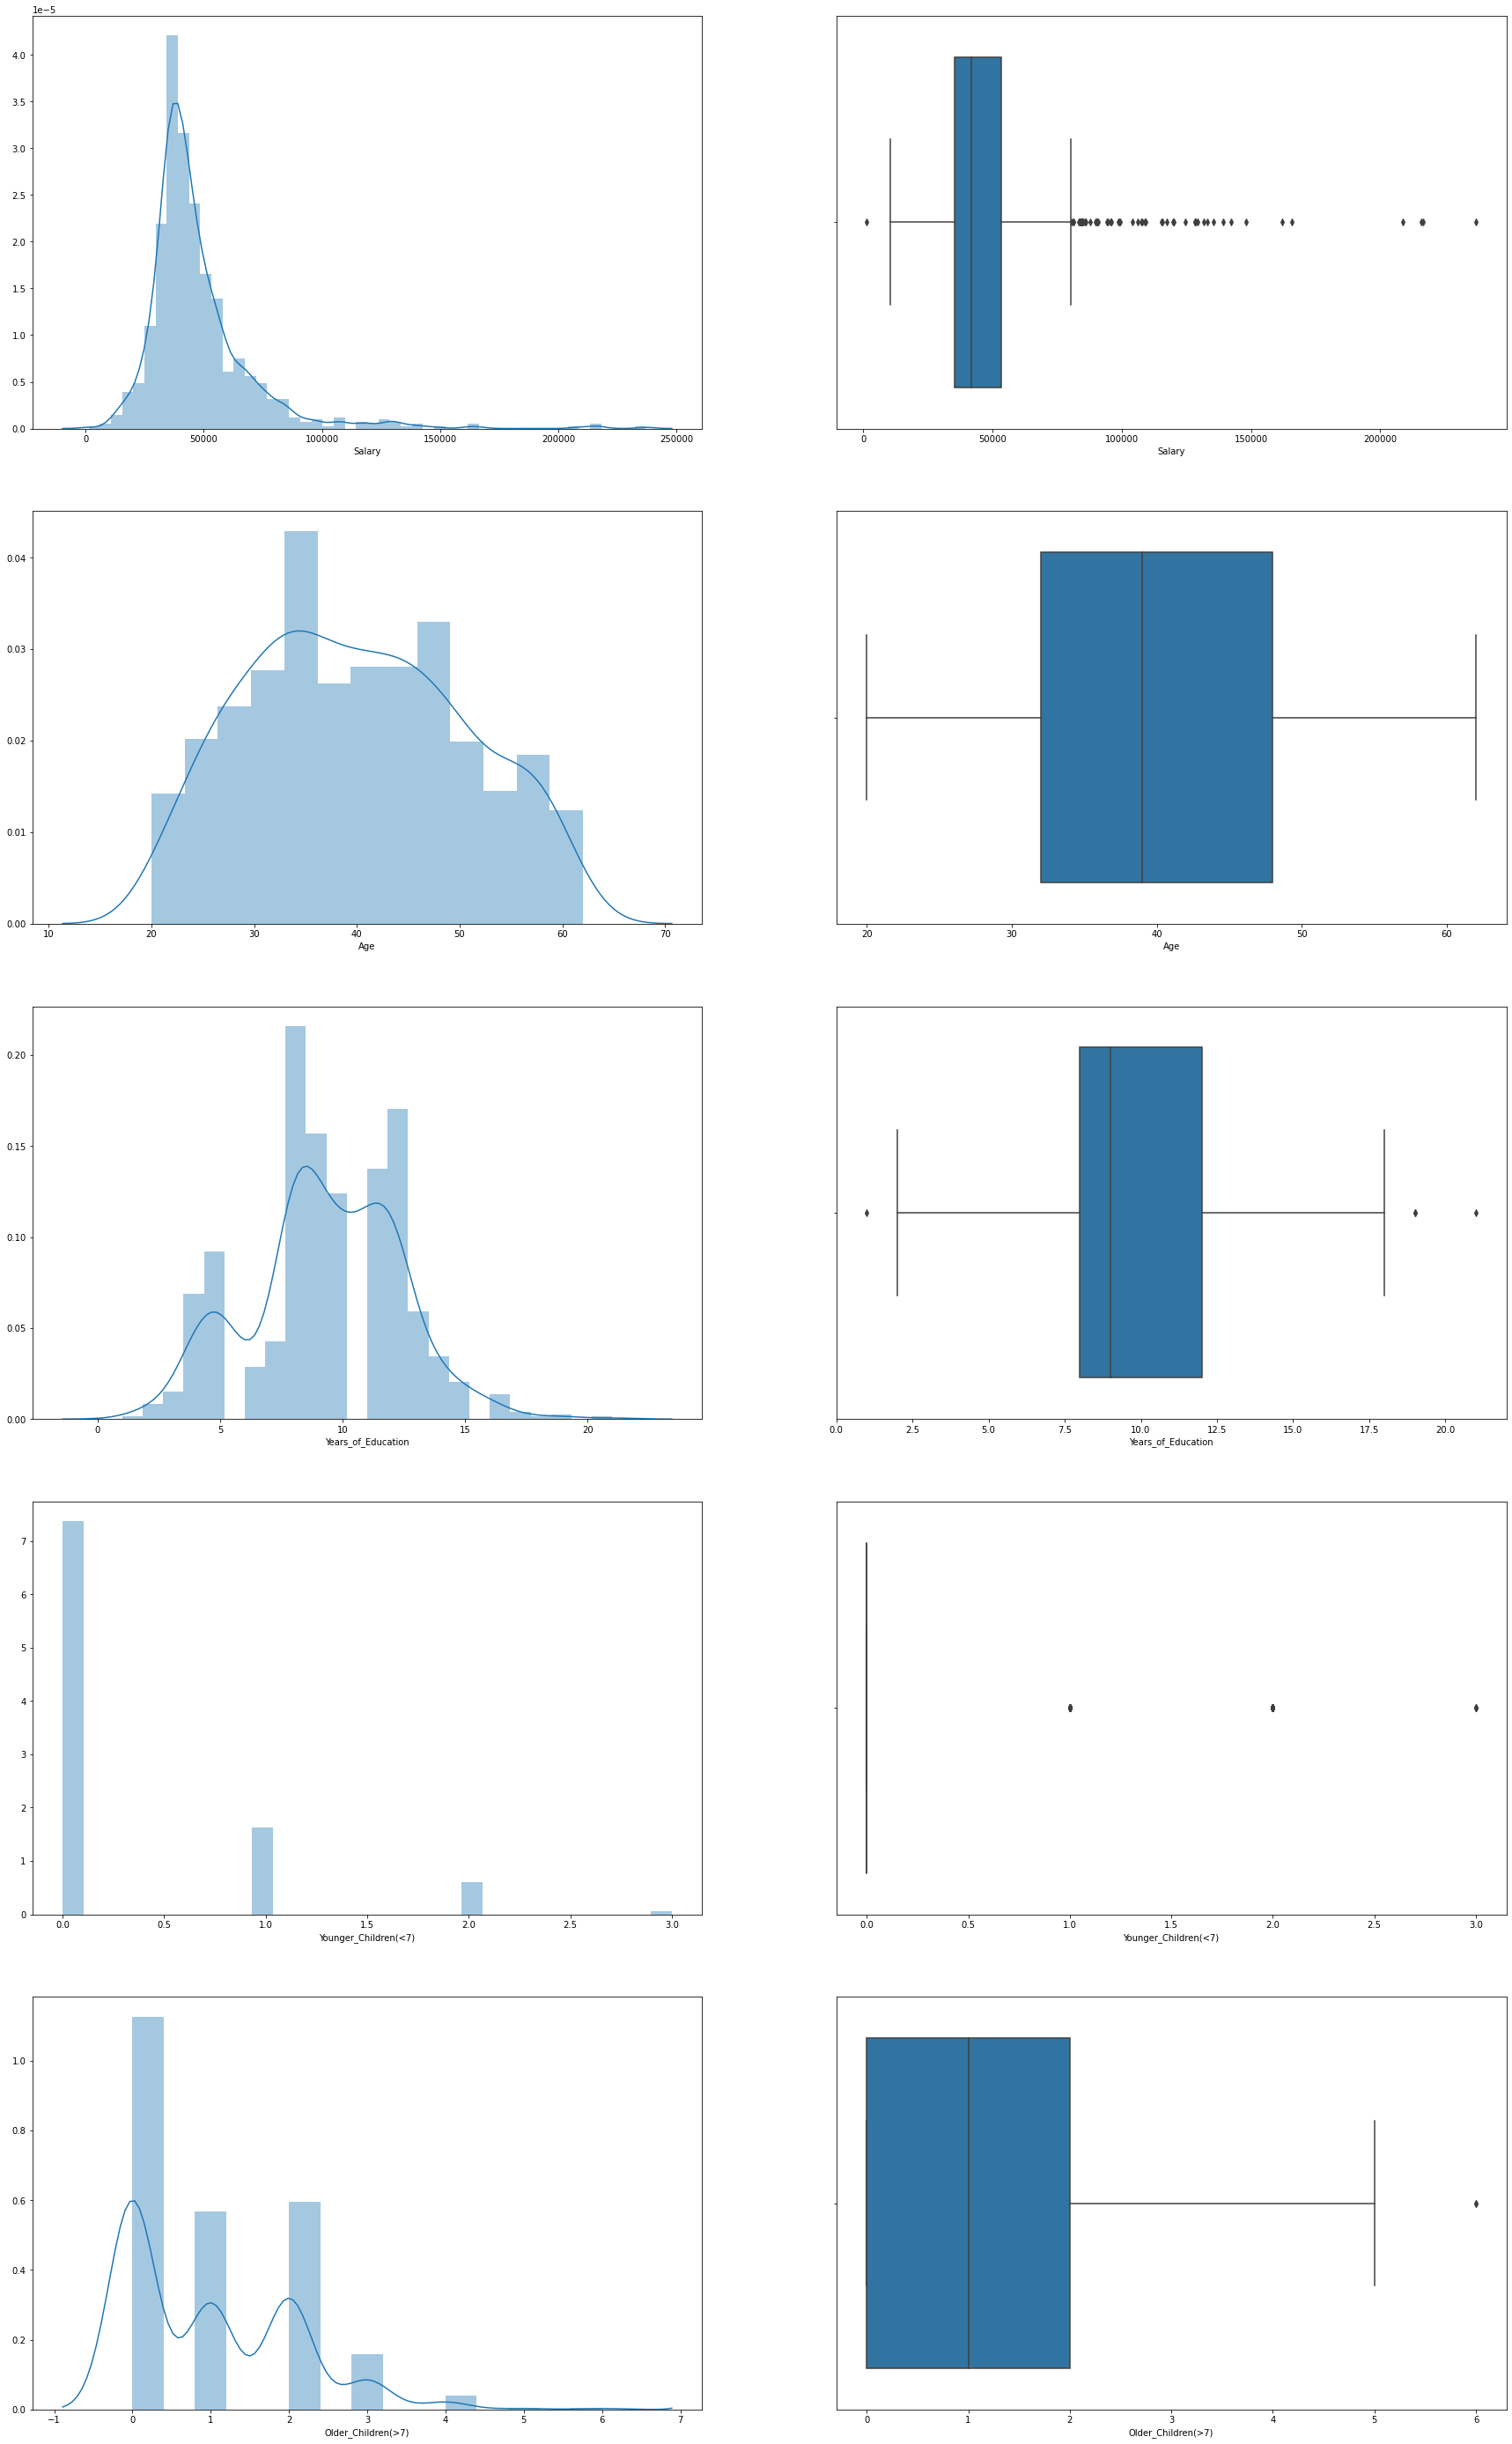

In [12]:
fig,axes = plt.subplots(nrows = 5, ncols = 2)

fig.set_size_inches(30,50)

m = 0
n = 0
for col in cols1:
    sns.distplot(df2[col],ax = axes[m][n])
    n = n + 1
    sns.boxplot(df2[col],ax = axes[m][n])
    m = m + 1
    n = n - 1

From the above we can say the following

1. Most of the Salary Range from 30,000 to 70,000
2. Age is distributed from 20 to 60
3. Years of Formal Education is concentrated from 8 to 14 years

#### Bivariate Analysis

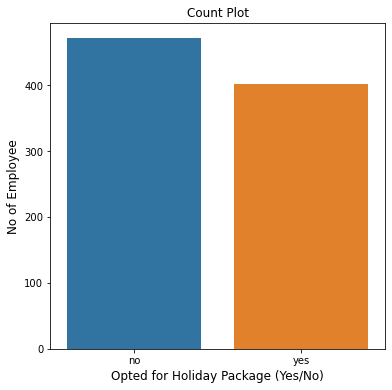

In [169]:
plt.figure(figsize=(6,6))
sns.countplot(df2['Holiday_Package'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('Opted for Holiday Package (Yes/No)',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

From the above we can say that our target variable is distributed equally, there is no overfit or underfit

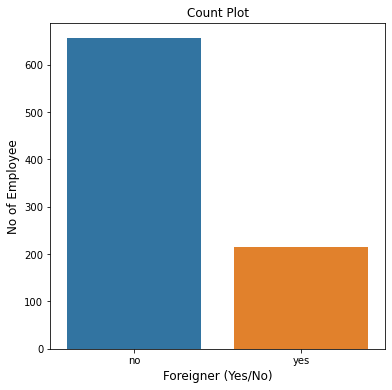

In [174]:
plt.figure(figsize=(6,6))
sns.countplot(df2['Foreigner'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('Foreigner (Yes/No)',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

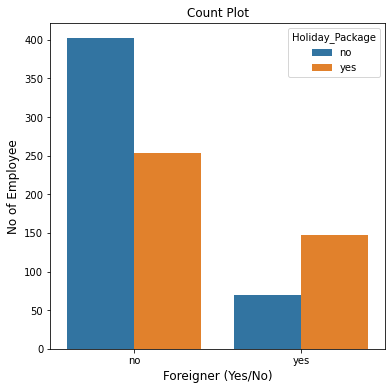

In [170]:
plt.figure(figsize=(6,6))
sns.countplot(df2['Foreigner'], hue = df2['Holiday_Package'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('Foreigner (Yes/No)',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

From the above we can say that there are significantly more native employee's who have opted for the holiday package when compared to Foreigner

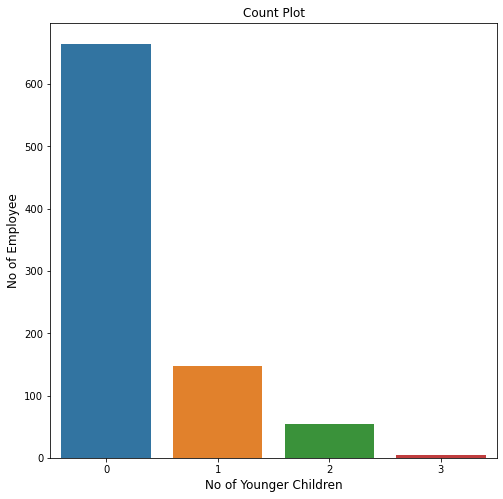

In [175]:
plt.figure(figsize=(8,8))
sns.countplot(df2['Younger_Children(<7)'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('No of Younger Children',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

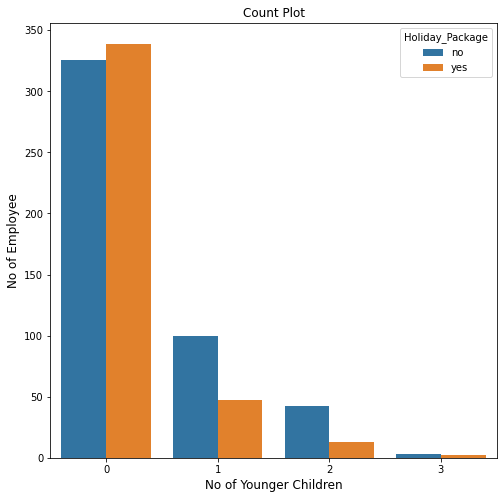

In [172]:
plt.figure(figsize=(8,8))
sns.countplot(df2['Younger_Children(<7)'], hue = df2['Holiday_Package'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('No of Younger Children',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

From the above plot we can see that the No of Employee having no young children (<7) is more have opted for holiday Package

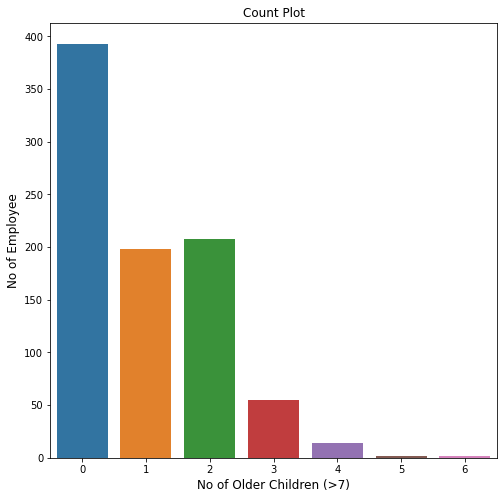

In [176]:
plt.figure(figsize=(8,8))
sns.countplot(df2['Older_Children(>7)'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('No of Older Children (>7)',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

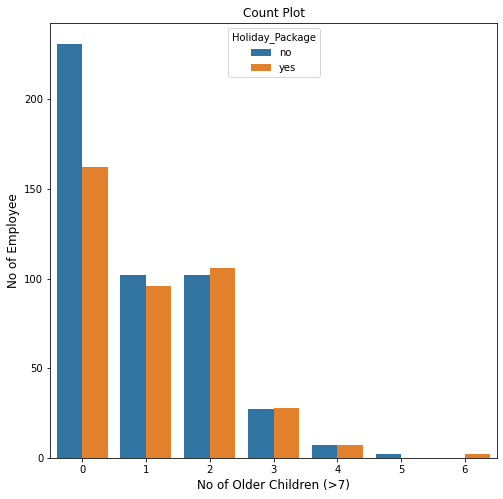

In [173]:
plt.figure(figsize=(8,8))
sns.countplot(df2['Older_Children(>7)'], hue = df2['Holiday_Package'])
plt.ylabel('No of Employee',fontsize = 12)
plt.xlabel('No of Older Children (>7)',fontsize = 12)
plt.title('Count Plot',fontsize = 12)
plt.show()

From the above plot we can see that the No of Employee having no of older children is equally distributed i.e. mostly equal number of employee who have older children opted for holiday package and not opted. 

#### Multivariate Analysis: Pairplot

C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


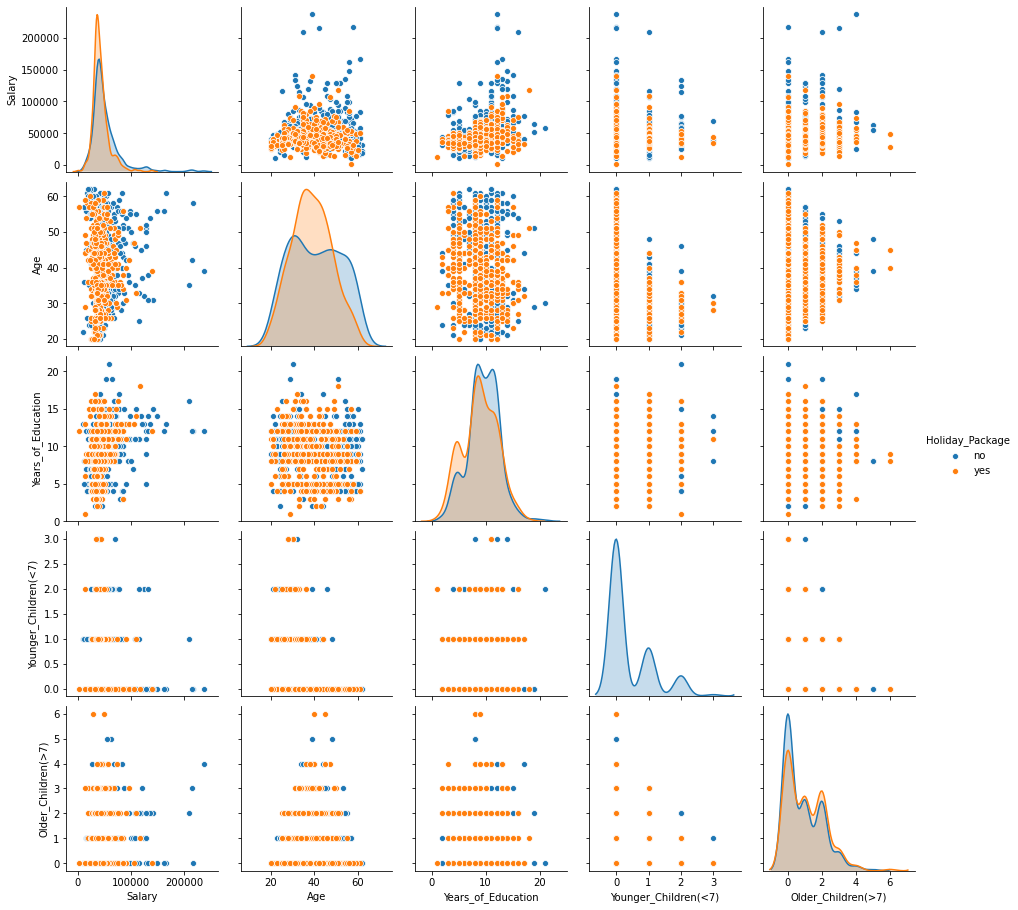

In [15]:
sns.pairplot(df2, hue = 'Holiday_Package' )

From the above pairplot we can the following
1. Salary is Highly Skewed
2. Age is Normaly Distributed
3. Years of Formal Education also looks normal with multiple peaks
4. Younger_children looks normal with multiple peaks
5. Older_children looks skewed with multiple peaks

#### Heatmap

In [104]:
corr1 = df2.corr()

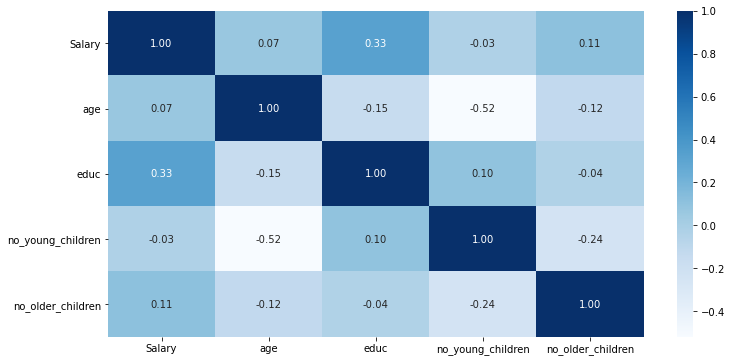

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

There is hardly any correlation between the numeric variables

#### Checking for Outliers : Box Plot

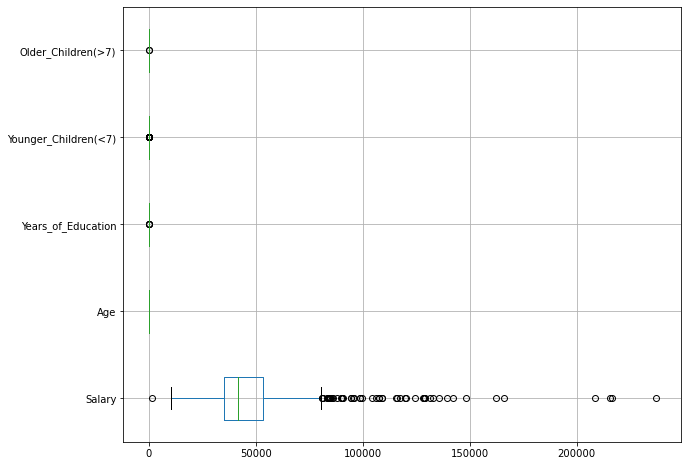

In [36]:
df2[['Salary', 'Age', 'Years_of_Education', 'Younger_Children(<7)', 'Older_Children(>7)']].boxplot(figsize = (10,8), vert = False)

From the above box plot we can see that salary is having significant number of outliers which is expected in the salary range. Hence we will not treat outliers in this case

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [37]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column)
        print(df2[column].value_counts())
        print('\n')

Holiday_Package
no     471
yes    401
Name: Holiday_Package, dtype: int64


Foreigner
no     656
yes    216
Name: Foreigner, dtype: int64




From the above we can see that there are Variables of Object type which need to be converted into Numerical Variable

#### Encoding Categorical Variables:

In [5]:
# using the below code we will convert the categorical variable into numerical variable

for feature in df2.columns:
    if df2[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Holiday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: Foreigner
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [6]:
df2.head()

,Holiday_Package,Salary,Age,Years_of_Education,Younger_Children(<7),Older_Children(>7),Foreigner
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


We have now Encoded the Categorical Variables into Numerical

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Holiday_Package       872 non-null    int8 
 1   Salary                872 non-null    int64
 2   Age                   872 non-null    int64
 3   Years_of_Education    872 non-null    int64
 4   Younger_Children(<7)  872 non-null    int64
 5   Older_Children(>7)    872 non-null    int64
 6   Foreigner             872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


#### Train Test Split

First step is to separate the Target Variable , we will be dropping the Target from the dataset and assigning it to variable 'X' and pop in another variable 'y'

In [7]:
# copy all the predictor variables into X dataframe
X = df2.drop(['Holiday_Package'],axis=1)

# Copy Target into y variable
y = df2['Holiday_Package']

In [12]:
X.head()

,Salary,Age,Years_of_Education,Younger_Children(<7),Older_Children(>7),Foreigner
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [13]:
y

0      0
1      1
2      0
3      0
4      0
      ..
867    0
868    1
869    0
870    1
871    0
Name: Holiday_Package, Length: 872, dtype: int8

Now we will split the data in to train and test. The training data consists of 70% of the data and testing data consists of 30%.

In [8]:
# Split the dataset into Training and Test in 70:30 ratio
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [56]:
X_train.shape

(610, 6)

In [9]:
X_train.head()

,Salary,Age,Years_of_Education,Younger_Children(<7),Older_Children(>7),Foreigner
502,34017,57,5,0,0,0
729,32197,22,6,1,0,1
604,132984,31,12,2,0,0
246,72394,50,14,0,1,0
494,28596,49,15,0,0,0


In [57]:
X_test.shape

(262, 6)

In [10]:
X_test.head()

,Salary,Age,Years_of_Education,Younger_Children(<7),Older_Children(>7),Foreigner
523,74580,29,13,1,0,0
731,36564,47,5,0,1,1
180,40635,24,8,2,0,0
185,124627,32,13,2,1,0
435,28158,40,9,0,6,0


In [58]:
y_train.shape

(610,)

In [63]:
y_test.shape

(262,)

### Model 1. Logistic Regression:

#### We will build Logistic Regression Model with following parameters (solver = Newton, Max Iteration = 500, Penalty = None)

In [13]:
model1 = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty = 'none', verbose = True, n_jobs = 2)
model1.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=500, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Finding the best parameters using Gridsearch CV

In [131]:
    grid = {'penalty':['l2','none'],
           'solver':['sag','lbfgs','newton-cg'],
           'tol':[0.001,0.0001]}

In [132]:
model1 = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty = 'none', verbose = True, n_jobs = 2)

In [133]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv= 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.001, 0.0001]})

#### Best Parameters 

In [134]:
print(grid_search.best_params_,'\n')

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 



In [14]:
# we will build model using the best parameters

model1 = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty = 'l2', verbose = True, n_jobs = 2, tol = 0.001)
model1.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(max_iter=500, n_jobs=2, solver='newton-cg', tol=0.001,
                   verbose=True)

#### Predicting on Training and Test dataset

In [15]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

#### Getting the Predicted Classes and Probs

In [16]:
ytest_predict_prob = model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904


### Model Evaluation

#### Accuracy Score for checking the performance of prediction on Training Sets

In [138]:
print('Accuracy Score for Training Set is : ', (model1.score(X_train,y_train)*100))

Accuracy Score for Training Set is :  68.0327868852459


In [140]:
acc_train_lr = model1.score(X_train,y_train)*100

#### Accuracy Score for checking the performance of prediction on Test Sets

In [88]:
print('Accuracy Score for Test Set is : ', (model1.score(X_test,y_test)*100))

Accuracy Score for Test Set is :  64.50381679389314


In [141]:
acc_test_lr = model1.score(X_test,y_test)*100

#### Confusion Matrix and Classification Report for Training Set

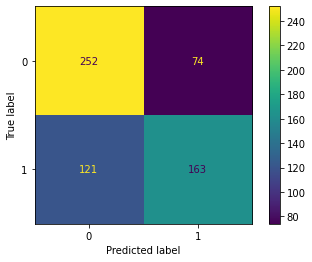

In [17]:
# Confusion matrix for Training set

plot_confusion_matrix(model1,X_train,y_train)

From the above confusion matrix for **Training Dataset** we can say the following,

1. True Positive = 163     (Predicted Yes and Actual Yes)
2. True Negative = 252     (Predicted No and Actual No)
3. False Negative = 121    (Predicted No and Actual Yes)
4. False Positive = 74     (Predicted Yes and Actual No)

In [18]:
# Classification Report for Training Set

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



From the above classification report for **Training Set** we can say the following 
1. Precision for the 1 (Opted for Holiday Package - Yes) is 69%
2. Accuracy for the Training Model is 68% which is marginally ok
3. Recall for 1 is 57% which is on lower side. 

In [19]:
log_reg_train = metrics.classification_report(y_train,ytrain_predict, output_dict = True)
df_log_train = pd.DataFrame(log_reg_train).transpose()
log_precision_train = (round(df_log_train.loc['1'][0],2))*100
log_recall_train = (round(df_log_train.loc['1'][1],2))*100
log_F1_train = (round(df_log_train.loc['1'][2],2))*100

#### Confusion Matrix and Classification Report for Test Set

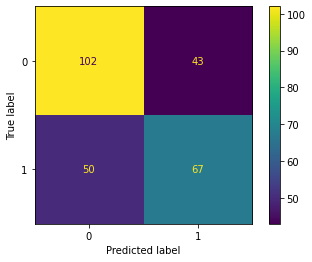

In [91]:
# Confusion matrix for Test set

plot_confusion_matrix(model1,X_test,y_test)

From the above confusion matrix for **Test Dataset** we can say the following,

1. True Positive = 67     (Predicted Yes and Actual Yes)
2. True Negative = 102     (Predicted No and Actual No)
3. False Negative = 50    (Predicted No and Actual Yes)
4. False Positive = 43     (Predicted Yes and Actual No)

In [93]:
# Classification Report for Test Set

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



From the above classification report for **Test Set** we can say the following 
1. Precision for the 1 (Opted for Holiday Package - Yes) is 61% which is reduced when compared to Training Set.
2. Accuracy for the Training Model is 65% which is marginally ok
3. Recall for 1 is 57% which is on lower side. 

In [148]:
log_reg_test = metrics.classification_report(y_test,ytest_predict, output_dict = True)
df_log_test = pd.DataFrame(log_reg_test).transpose()
log_precision_test = (round(df_log_test.loc['1'][0],2))*100
log_recall_test = (round(df_log_test.loc['1'][1],2))*100
log_F1_test = (round(df_log_test.loc['1'][2],2))*100

#### AUC and ROC for Training Data 

AUC: 0.743


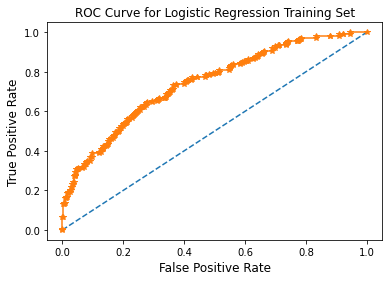

In [22]:
# AUC and ROC Curve for Training Data

probs1 = model1.predict_proba(X_train)
probs1 = probs1[:,1]
auc_log_train = roc_auc_score(y_train,probs1)
print('AUC: %.3f' % auc_log_train)
fpr,tpr,thres = roc_curve(y_train, probs1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '*')
plt.title('ROC Curve for Logistic Regression Training Set',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
plt.show()

From the ROC Curve for **Training Set** we can say the Area Under the Curve (AUC) is **74.3%** 

#### AUC and ROC for Test Data 

AUC: 0.705


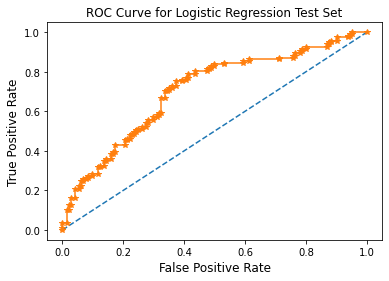

In [23]:
# AUC and ROC Curve for Test Data

probs2 = model1.predict_proba(X_test)
probs2 = probs2[:,1]
auc_log_test = roc_auc_score(y_test,probs2)
print('AUC: %.3f' % auc_log_test)
fpr,tpr,thres = roc_curve(y_test, probs2)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '*')
plt.title('ROC Curve for Logistic Regression Test Set',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
plt.show()

From the ROC Curve for **Test Set** we can say the Area Under the Curve (AUC) is **70.5%** 

### Model 2. Linear Discriminant Analysis

We will build LDA Model and Fit into Training Set

In [24]:
clf = LinearDiscriminantAnalysis()
model2 = clf.fit(X_train,y_train)
model2

LinearDiscriminantAnalysis()

#### Predicting on Training and Test Set

In [25]:
ytrain_predict_lda = model2.predict(X_train)
ytest_predict_lda = model2.predict(X_test)

In [98]:
ytrain_predict_lda

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [99]:
ytest_predict_lda

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

#### Getting the Predicted Classes and Probs

In [26]:
ytest_predict_prob_lda = model2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.736312,0.263688
1,0.277893,0.722107
2,0.887243,0.112757
3,0.967803,0.032197
4,0.523170,0.476830


### Model Evaluation

#### Accuracy Score for checking the performance of prediction on Training Set

In [101]:
print('Accuracy Score for Training Set is : ', (model2.score(X_train,y_train)*100))

Accuracy Score for Training Set is :  67.21311475409836


In [156]:
acc_lda_train = model2.score(X_train,y_train)*100

#### Accuracy Score for checking the performance of prediction on Test Set

In [102]:
print('Accuracy Score for Training Set is : ', (model2.score(X_test,y_test)*100))

Accuracy Score for Training Set is :  64.12213740458014


In [157]:
acc_lda_test = model2.score(X_test,y_test)*100

#### Confusion Matrix and Classification Report for Training Set

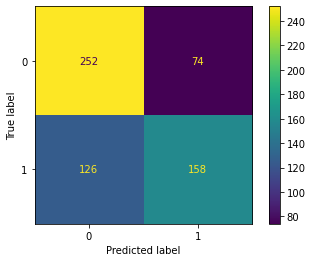

In [103]:
# Confusion matrix for Training set

plot_confusion_matrix(model2,X_train,y_train)

From the above confusion matrix for **Training Dataset** we can say the following,

1. True Positive = 158     (Predicted Yes and Actual Yes)
2. True Negative = 252     (Predicted No and Actual No)
3. False Negative = 126    (Predicted No and Actual Yes)
4. False Positive = 74     (Predicted Yes and Actual No)

In [104]:
# Classification Report for Training Set

print(classification_report(y_train,ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



From the above classification report for **Training Set** we can say the following 
1. Precision for the 1 (Opted for Holiday Package - Yes) is 68%
2. Accuracy for the Training Model is 67% which is marginally ok
3. Recall for 1 is 56% which is on lower side. 

In [151]:
lda_train = metrics.classification_report(y_train,ytrain_predict_lda, output_dict = True)
df_lda_train = pd.DataFrame(lda_train).transpose()
lda_precision_train = (round(df_lda_train.loc['1'][0],2))*100
lda_recall_train = (round(df_lda_train.loc['1'][1],2))*100
lda_F1_train = (round(df_lda_train.loc['1'][2],2))*100

#### Confusion Matrix and Classification Report for Test Set

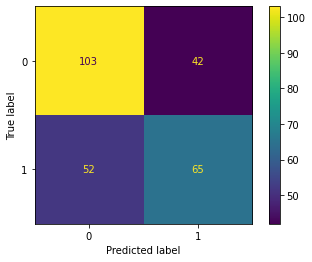

In [105]:
# Confusion matrix for Test set

plot_confusion_matrix(model2,X_test,y_test)

From the above confusion matrix for **Test Set** we can say the following,

1. True Positive = 65     (Predicted Yes and Actual Yes)
2. True Negative = 103     (Predicted No and Actual No)
3. False Negative = 52    (Predicted No and Actual Yes)
4. False Positive = 42     (Predicted Yes and Actual No)

In [106]:
# Classification Report for Test Set

print(classification_report(y_test,ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



From the above classification report for **Test Set** we can say the following 
1. Precision for the 1 (Opted for Holiday Package - Yes) is 61%
2. Accuracy for the Training Model is 64% which is marginally ok
3. Recall for 1 is 56% which is on lower side. 

In [153]:
lda_test = metrics.classification_report(y_test,ytest_predict_lda, output_dict = True)
df_lda_test = pd.DataFrame(lda_test).transpose()
lda_precision_test = (round(df_lda_test.loc['1'][0],2))*100
lda_recall_test = (round(df_lda_test.loc['1'][1],2))*100
lda_F1_test = (round(df_lda_test.loc['1'][2],2))*100

#### AUC and ROC for Training Data

AUC: 0.742


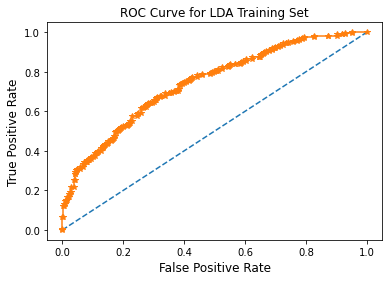

In [27]:
# AUC and ROC Curve for Training Data

probs3 = model2.predict_proba(X_train)
probs3 = probs3[:,1]
auc_lda_train = roc_auc_score(y_train,probs3)
print('AUC: %.3f' % auc_lda_train)
fpr,tpr,thres = roc_curve(y_train, probs3)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '*')
plt.title('ROC Curve for LDA Training Set',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
plt.show()

From the ROC Curve for **Training Set** we can say the Area Under the Curve (AUC) is **74.2%** 

#### AUC and ROC for Test Data

AUC: 0.703


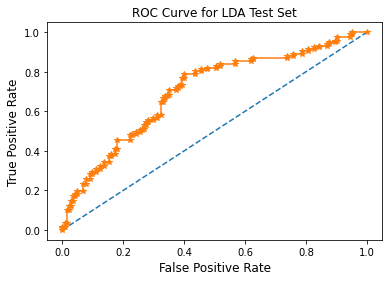

In [28]:
# AUC and ROC Curve for Test Data

probs4 = model2.predict_proba(X_test)
probs4 = probs4[:,1]
auc_lda_test = roc_auc_score(y_test,probs4)
print('AUC: %.3f' % auc_lda_test)
fpr,tpr,thres = roc_curve(y_test, probs4)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '*')
plt.title('ROC Curve for LDA Test Set',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
plt.show()

From the ROC Curve for **Test Set** we can say the Area Under the Curve (AUC) is **70.3%** 

#### AUC and ROC for Logistic Regression:

AUC Training 0.7428497364555431
AUC Test 0.7047450633657529


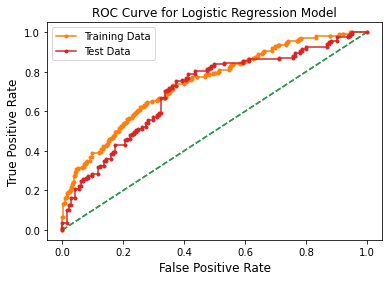

In [123]:
### Training
plt.title('ROC Curve for Logistic Regression Model',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
auc = roc_auc_score(y_train,probs1)
print('AUC Training', auc)
fpr,tpr,thres = roc_curve(y_train, probs1)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

###Test
auc = roc_auc_score(y_test,probs2)
print('AUC Test', auc)
fpr,tpr,thres = roc_curve(y_test, probs2)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

#### AUC and ROC for Linear Discriminant Analysis:

AUC Training 0.7421152682968979
AUC Test 0.7029177718832891


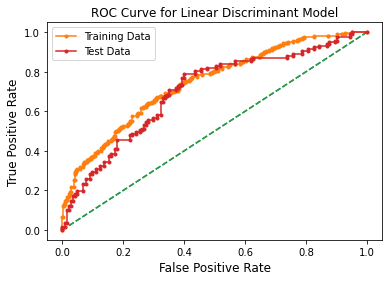

In [125]:
### Training
plt.title('ROC Curve for Linear Discriminant Model',fontsize = 12)
plt.ylabel('True Positive Rate',fontsize = 12)
plt.xlabel('False Positive Rate',fontsize = 12)
auc = roc_auc_score(y_train,probs3)
print('AUC Training', auc)
fpr,tpr,thres = roc_curve(y_train, probs3)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

###Test
auc = roc_auc_score(y_test,probs4)
print('AUC Test', auc)
fpr,tpr,thres = roc_curve(y_test, probs4)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

#### Comparing Both Models (Logistic Regression & Linear Discriminant Analysis)

In [160]:
index = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score']

data = pd.DataFrame({'Log Regression Train' : [acc_train_lr, auc_log_train*100, log_precision_train , log_recall_train, log_F1_train],
                     'Log Regression Test' : [acc_test_lr, auc_log_test*100,log_precision_test , log_recall_test, log_F1_test],
                     'LDA Train' : [acc_lda_train, auc_lda_train*100,lda_precision_train , lda_recall_train, lda_F1_train],
                     'LDA Test' : [acc_lda_test, auc_lda_test*100, lda_precision_test , lda_recall_test, lda_F1_test]}, index = index)
round(data,2)

,Log Regression Train,Log Regression Test,LDA Train,LDA Test
Accuracy,68.03,64.50,67.21,64.12
AUC,74.28,70.47,74.21,70.29
Precision,69.00,61.00,68.00,61.00
Recall,57.00,57.00,56.00,56.00
F1 Score,63.00,59.00,61.00,58.00


From the above data we can say the following,

1. Accuracy is Highest for Logistic Regression for both Train & Test (Slightly greater than LDA)
2. AUC Score is mostly same for both the models
3. Precision is Highest for Logistic Regression for Train Set
4. F1 Score is Highest for Logistic Regression for both Train & Test Set

We have achieved Precision Rate for Train Data 69% with Logistic Regression Model, which is good as High Precision Relates to **Low False Positive Rate** as in this case we require Low False Positive Rate i.e. Predicted Yes but actual No

So, from the above data we can say **Logistic Regression** is best/optimized model based on the following parameters: Accuracy, AUC Score, Precision & Recall

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

We had a business problem where we need predict whether an employee would opt for a holiday package or not. The given data set consists of **7 Variables** and **872 Observations**. Dataset consits no **Null values** and no **duplicate values**. 

We have observed significantly low outliers in the following variables Years of Formal Education, Younger Children & Older Children. But we have observed Outliers in Salary Column which seems genuine hence we will not be treating the outliers.

From the EDA analysis we understand the following,

1. The Dataset is Almost Equal Distributed Between the Number of Employee who have opted for the Holiday Package and not opted. Hence here there is no doubt of overfitting or underfitting. No of Employee who have not opted for the Package is slightly higher. 

2. No of Foreigners is Less when compared to the native. Number of Native Employee's who of opted for the Holiday Package is higher when compared to Foreigners. 

3. Number of Employee's who are having 0 younger children are more and most of them opted for the Holiday Package.

4. Number of Employee's who are having 0 older children are more when compared to others and most of them opted for Holiday Package. 

5. From the pair plot we can say that Employee who has High Salaries didnt opt for the Holiday Package.

6. Similarly Employee whose age is greater than 50 didnt opt for the Holidat Package. 

7. There is hardly any correlation between the variables.

After doing the EDA we have built two models i.e. Logistic Regression Model & Linear Discriminant Analysis. By Looking the at the performance/model evaluation we can say that both the models are getting same results, Logistic Regression being slightly on higer side. We might require more data along with additional varibles like Mode of Travel, Location etc so as to build a good model. 

Important Factors:

1. Employee who are having No children
2. Native Employee's (Not Foreigner)
3. Salary
4. Age

Recommendations:

1. The Company should focus on Employee's who are having 0 children. As Most Number of Employee with 0 children opted for the Package.

2. The Company can focus on Medium Salary Employee's as we can see that most high salried employee's didnt opt for  the package.

3. The Company should focus on Age group between 30 to 50 as most of these age group only opted for the package. 

4. Company should focus on high salary employee's as there would be certain increase in the sales value. 

**End**